In [99]:
import yfinance as yf 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import os

In [100]:
sp500 = yf.Ticker("^GSPC") # Initializing Ticker object for the S&P 500 index
sp500 = sp500.history(start = "2000-01-01", end = "2023-01-01") # Retrieving historical stock price data from Yahoo Finance, limiting the period

In [101]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,0.0,0.0
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,0.0,0.0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,0.0,0.0


<AxesSubplot:xlabel='Date'>

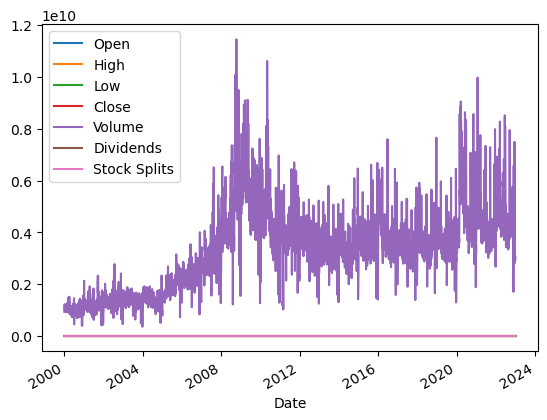

In [102]:
sp500.plot.line(use_index=True)

<AxesSubplot:xlabel='Date'>

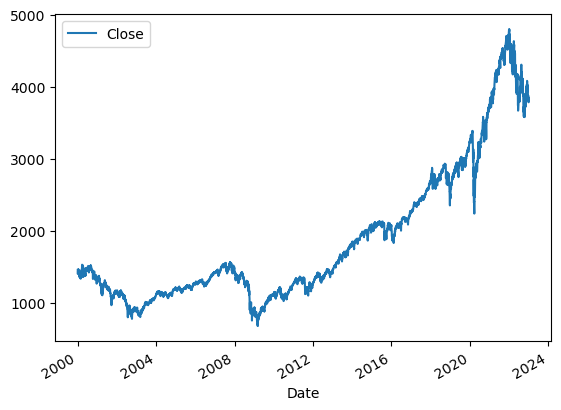

In [103]:
sp500.plot.line(y="Close", use_index=True) # closing price against the index. (date)

In [104]:
sp500.drop(columns=["Dividends", "Stock Splits"], inplace=True) # deleting the columns we dont need, and saving the changes.
sp500

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000
...,...,...,...,...,...
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,2819280000
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000


In [105]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) # Creating a new column for the next day's closing price

In [106]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # Returned boolean will be converted to 1 if the value goes up, 0 otherwise.

In [107]:
sp500 = sp500.loc["2000-01-01":].copy() # getting rid of historical data ie all data that came before 2000.
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,3829.250000,0
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971,0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029,1


In [108]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100] # Creating training set
test = sp500.iloc[-100:] # Creating testing set

predictors = ["Close", "Volume", "Open", "High", "Low"] # columns we will be using to make the predictions
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [109]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)
# model predicted stock would go up and it did go up, around 69% of the times.

0.3472222222222222

<AxesSubplot:xlabel='Date'>

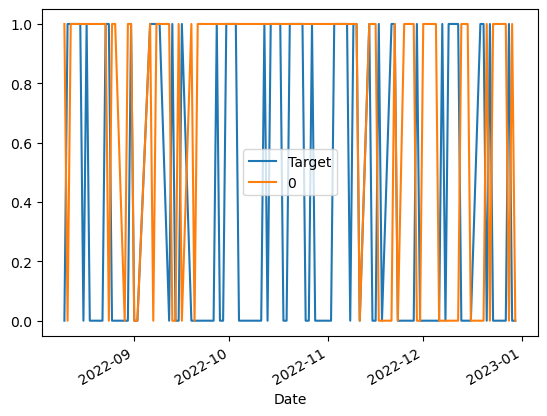

In [110]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [111]:
# Function to predict target variable using the model
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [112]:
# Function for backtesting the model
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [113]:
# Running backtesting with the model and predictors
predictions = backtest(sp500, model, predictors)

In [114]:
predictions["Predictions"].value_counts() # Counting predicted values

1    1684
0    1603
Name: Predictions, dtype: int64

In [115]:
precision_score(predictions["Target"], predictions["Predictions"]) # Calculating precision score

0.5213776722090261

In [116]:
predictions["Target"].value_counts() / predictions.shape[0] # Calculating distribution of actual values

1    0.543353
0    0.456647
Name: Target, dtype: float64

In [117]:
horizons = [2,5,60,250,1000] # Defining different time horizons for rolling averages
new_predictors = []

# Loop for creating rolling averages and trends as new predictors
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [118]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [119]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1094.040039,1098.469971,1094.040039,1095.890015,356070000,1109.479980,1,1.000845,1.0,1.002176,3.0,1.039354,34.0,1.137825,135.0,0.957328,485.0
2003-12-29 00:00:00-05:00,1095.890015,1109.479980,1095.890015,1109.479980,1058800000,1109.640015,1,1.006162,2.0,1.010755,4.0,1.050761,34.0,1.150837,135.0,0.969445,486.0
2003-12-30 00:00:00-05:00,1109.479980,1109.750000,1106.410034,1109.640015,1012600000,1111.920044,1,1.000072,2.0,1.007835,4.0,1.049591,34.0,1.150046,135.0,0.969833,486.0
2003-12-31 00:00:00-05:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,1108.479980,0,1.001026,2.0,1.006997,4.0,1.050463,34.0,1.151439,136.0,0.972073,486.0
2004-01-02 00:00:00-05:00,1111.920044,1118.849976,1105.079956,1108.479980,1153200000,1122.219971,1,0.998451,1.0,1.001263,4.0,1.046073,33.0,1.147024,135.0,0.969348,485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,3815.110107,3845.800049,3797.010010,3844.820068,2819280000,3829.250000,0,1.002925,1.0,1.002042,3.0,0.998833,25.0,0.935239,108.0,1.059599,542.0
2022-12-27 00:00:00-05:00,3843.340088,3846.649902,3813.219971,3829.250000,3030300000,3783.219971,0,0.997971,1.0,0.997381,3.0,0.993740,25.0,0.932326,107.0,1.054943,541.0
2022-12-28 00:00:00-05:00,3829.560059,3848.320068,3780.780029,3783.219971,3083520000,3849.280029,1,0.993953,0.0,0.987367,2.0,0.981350,24.0,0.922013,107.0,1.041918,540.0


In [120]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [121]:
# Updated predict function to use predict_proba and apply threshold for binary prediction
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [122]:
predictions = backtest(sp500, model, new_predictors)

In [123]:
predictions["Predictions"].value_counts() # Counting predicted values

0.0    1885
1.0     402
Name: Predictions, dtype: int64

In [124]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5348258706467661

In [125]:
predictions["Target"].value_counts() / predictions.shape[0] # Calculating distribution of actual values

1    0.535199
0    0.464801
Name: Target, dtype: float64

In [126]:
predictions # the predictions dataframe

,Target,Predictions
Date,,
2013-12-02 00:00:00-05:00,0,0.0
2013-12-03 00:00:00-05:00,0,0.0
2013-12-04 00:00:00-05:00,0,0.0
2013-12-05 00:00:00-05:00,1,0.0
2013-12-06 00:00:00-05:00,1,0.0
...,...,...
2022-12-23 00:00:00-05:00,0,0.0
2022-12-27 00:00:00-05:00,0,0.0
2022-12-28 00:00:00-05:00,1,0.0
